# Tutorial 8: ID5055 Foundations of Machine Learning

**Topics Covered**: Linear Discriminant Analysis, Logistic Regression

#### Questions
1. As part of this tutorial you are supposed to use LDA and LR implementations in ```sklearn``` library and then carry out model fitting on datasets 5 and 6 as provided below. Both the datasets have already been split into train and test sets (can be done by running corresponding cells). On each of these datasets, fit both models on the train set and report classification statistics on the test set using ```sklearn.metrics.classification_report```.

2. __(Optional)__ Using the ```mpl_toolkits.mplot3d``` module attempt to plot a decision boundary for 3d data.

3. __(Optional)__ Using the ```sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis``` function attempt to do QDA on the 2D datasets and visualize the decision boundary for the same.

Write your code in the cells mentioned. Please ensure your notebook runs correctly without errors when using __Kernel -> Restart & Run All__ 

In [1]:
import math
import random
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_blobs, make_circles

### DO NOT EDIT ###
# set seeds
seed = 0
random.seed = 0
np.random.seed = 0
sns.set_style('darkgrid')

### Helper Functions

In [2]:
### DO NOT EDIT ###

# This function plots the decision boundary of a classifier
# A set of input points are also plotted as scatterplot
def plot_decision_boundary(clf, X, Y, title, step = 0.02, cmap='Paired_r'):
    h = step
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize dataset
    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.4)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k')
    plt.title(title)
    plt.show()

In [3]:
### DO NOT EDIT ###
# wrapper function to plot decision regions of LR and LDA
# provide dataset name in title
def plot_data(lr, lda, X, y, step = 0.02, title = ''):
    plot_decision_boundary(lr, X, y, 'Logistic Regression: '+title, step = step, cmap='Paired_r')
    plot_decision_boundary(lda, X, y, 'Linear Discriminant Analysis: '+title, step = step, cmap='Paired_r')

### Linear Discriminant Analysis

LDA is a linear classification and dimensionality reduction technique that attempts to find a linear combination of features that best separates or characterizes two or more classes. It is a linear method and makes use of the following assumptions:

- Class conditional probability $(f_k = P(\bar{x}|y=k))$ is Gaussian distributed
- Covariances of all classes are the same: **Homoscedasticity assumption** (homogeneity of variance)
<!-- We know that the probability of a data point $x$ belonging to a certain class $k$ can be written as:
$$P(y=k|\bar{x}) = \frac{P(\bar{x}|y=k)\cdot P(y=k)}{\sum_{k'=1}^K P(\bar{x}|y=k')\cdot P(y=k')} = \frac{f_k\cdot \Pi_k}{\sum_{k'=1}^Kf_{k'}\cdot \Pi_{k'}}$$

We know that $\Pi_k$ can be calculated directly from the training data. Using the two assumptions, it models $f_k$ as a multivariate gaussian distribution of the form:
$$f_k = \frac{1}{(2\pi)^{n/2}|\mathbf{\Sigma}_k|^{1/2}} \cdot exp\Big(\frac{-(\mathbf{x}-\mathbf{\mu}_k)^T\cdot\mathbf{\Sigma}_k^{-1}\cdot(\mathbf{x}-\mathbf{\mu}_k))}{2}\Big)$$
where:
- $\mathbf{\mu}_k$: is the mean of data points belonging to class $k$
- $\mathbf{\Sigma}_k$: is the covariance matrix of data points belonging to class $k$

The homoscedasticity assumption enforces $\mathbf{\Sigma}_k = \mathbf{\Sigma}$ for every class $k$. The decision boundary between two classes occurs when:
$$\frac{P(y=k|\bar{x})}{P(y=l|\bar{x})} = 1 \quad\Longrightarrow\quad \log{\frac{P(y=k|\bar{x})}{P(y=l|\bar{x})}} = 0$$

Solving this we get that the decision boundary occurs at $\delta_k = \delta_l$ where:

$$\delta_k = \log{\Pi_k} - \frac{1}{2}\mathbf{\mu}_k^T\mathbf{\Sigma}^{-1}\mathbf{\mu}_k + \mathbf{x}^T\mathbf{\Sigma}^{-1}\mathbf{\mu}_k$$ -->

### Logistic Regression

Logistic regression is a statistical model that models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables. The likelihood of the parameters of the log-odds expression given a certain series of datapoints is then maximized using any gradient descent or iterative methods (eg. Newton Raphson method).

**What method does sklearn use as default?**

### LDA vs LR

- Both produce linear boundaries.
- LDA assumes that the observations are drawn from the normal distribution with common variance in each class, while logistic regression does not have this assumption.
- Logistic regression is unstable when the classes are well separated.
- In the case where $N$ is small, and the distribution of predictors $X$ is approximately normal, then LDA is more stable than Logistic Regression.

### Dataset 1: Well-separated Classes with Isotropic Covariance

The first dataset consists of two blobs of data. This corresponds to data points which have an isotropic covariance matrix for each class. The covariance matrix is taken to be the same for both the classes.

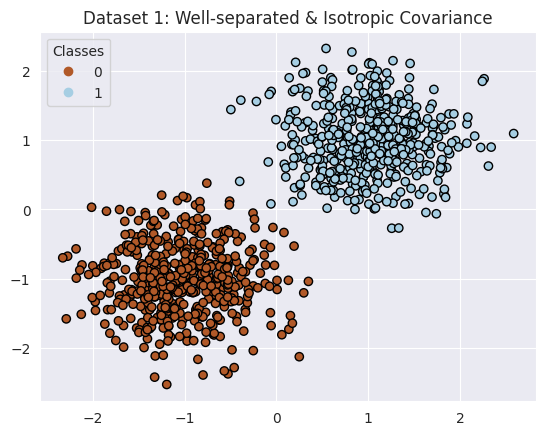

In [4]:
means1 = [[-1, -1], [1, 1]]
stds = 0.5

X_circ, y_circ = make_blobs(1000, 2, centers = means1, 
                    cluster_std = stds, random_state=seed)

fig, ax = plt.subplots()
scatter1 = ax.scatter(X_circ[:,0], X_circ[:, 1], c = y_circ, cmap = 'Paired_r', edgecolors='k')
legend1 = ax.legend(*scatter1.legend_elements(), title="Classes")
plt.title('Dataset 1: Well-separated & Isotropic Covariance')
plt.show()

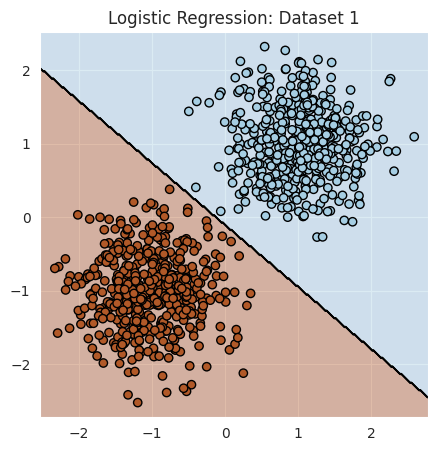

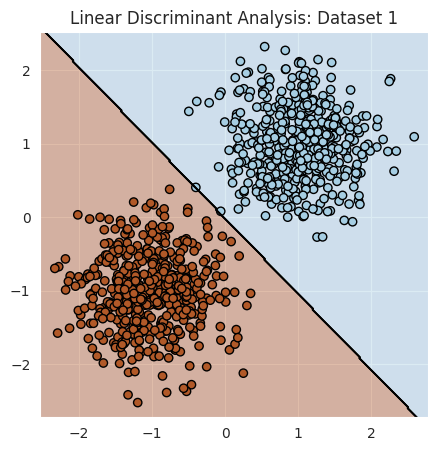

In [5]:
lr = LogisticRegression(penalty = None, solver = "lbfgs", multi_class = "multinomial", random_state = seed)
lda = LinearDiscriminantAnalysis()

lr.fit(X_circ, y_circ)
lda.fit(X_circ, y_circ)

plot_data(lr, lda, X_circ, y_circ, title = 'Dataset 1')

### Dataset 2: Well-separated Classes with Same Covariance

The second dataset consists of two classes of data points picked from multivariate gaussian distributions with different means. The covariance matrix is taken to be the same for both the classes.

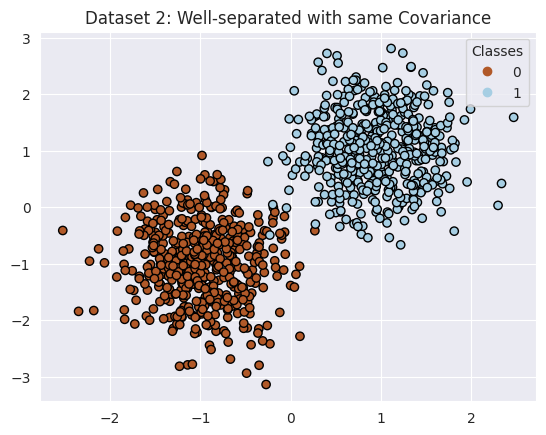

In [6]:
means2 = [[-1, -1], [1, 1]]
covs2 = [[0.2, 0], [0, 0.5]]
num = 500  # datapoints per class

X2 = np.concatenate([
    np.random.multivariate_normal(means2[0], covs2, size=(num,)),
    np.random.multivariate_normal(means2[1], covs2, size=(num,))
], axis=0)
y2 = np.concatenate([[0] * num, [1] * num], axis = 0)

# visualize the dataset
fig, ax = plt.subplots()
scatter2 = ax.scatter(X2[:,0], X2[:, 1], c = y2, cmap = 'Paired_r', edgecolors='k')
legend2 = ax.legend(*scatter2.legend_elements(), title="Classes")
plt.title('Dataset 2: Well-separated with same Covariance')
plt.show()

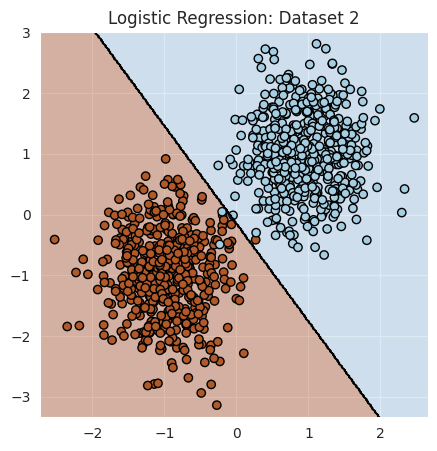

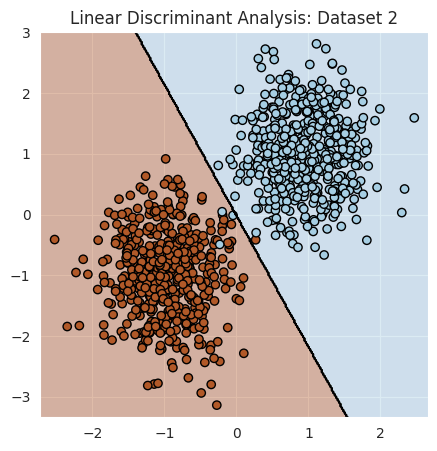

In [7]:
lr2= LogisticRegression(penalty = None, solver = "lbfgs", multi_class = "multinomial", random_state = seed)
lda2 = LinearDiscriminantAnalysis()

lr2.fit(X2, y2)
lda2.fit(X2, y2)

plot_data(lr2, lda2, X2, y2, title = 'Dataset 2')

### Dataset 3: Well-separated Classes with Different Covariance

The third dataset consists of two classes of data points picked from multivariate gaussian distributions with different means. The covariance matrix is taken to be the different for both the classes.

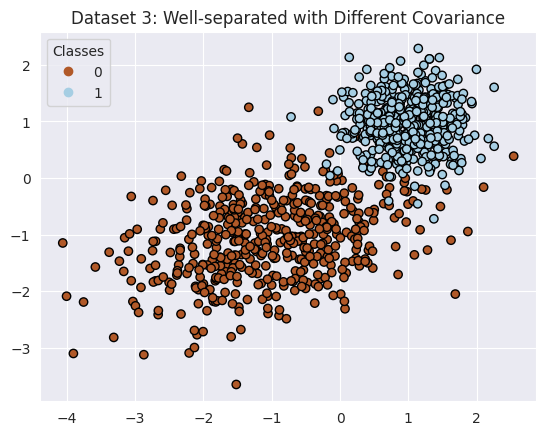

In [8]:
means3 = [[-1, -1], [1, 1]]
covs3 = [
    [[1.0, 0.2], [0.2, .5]],
    [[0.2, 0], [0, 0.2]]
]
num = 500  # datapoints per class

X3 = np.concatenate([
    np.random.multivariate_normal(means3[0], covs3[0], size=(num,)),
    np.random.multivariate_normal(means3[1], covs3[1], size=(num,))
], axis=0)
y3 = np.concatenate([[0] * num, [1] * num], axis=0)

# visualize the dataset
fig, ax = plt.subplots()
scatter3 = ax.scatter(X3[:,0], X3[:, 1], c = y3, cmap = 'Paired_r', edgecolors='k')
legend3 = ax.legend(*scatter3.legend_elements(), title="Classes")
plt.title('Dataset 3: Well-separated with Different Covariance')
plt.show()

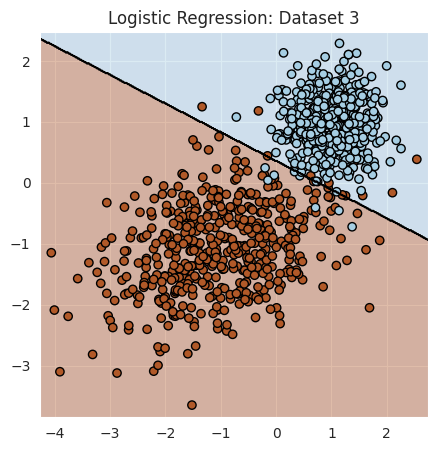

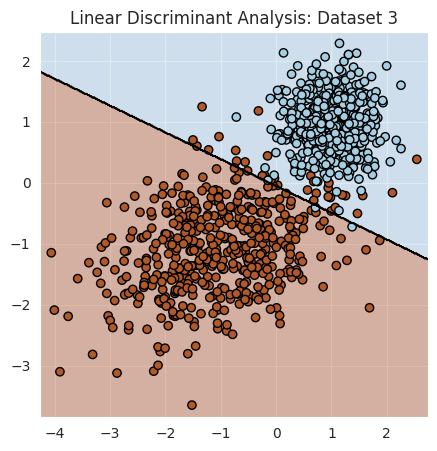

In [9]:
lr3 = LogisticRegression(penalty = None, solver = "lbfgs", multi_class = "multinomial", random_state = seed)
lda3 = LinearDiscriminantAnalysis()

lr3.fit(X3, y3)
lda3.fit(X3, y3)

plot_data(lr3, lda3, X3, y3, title = 'Dataset 3')

### Dataset 4: Classes very close together

The fourth dataset consists of two classes of data points picked along lines very close to each other. The idea here is that both LR and LDA can effectively separate the classes despite being placed very close to each other because there exists a linear separation

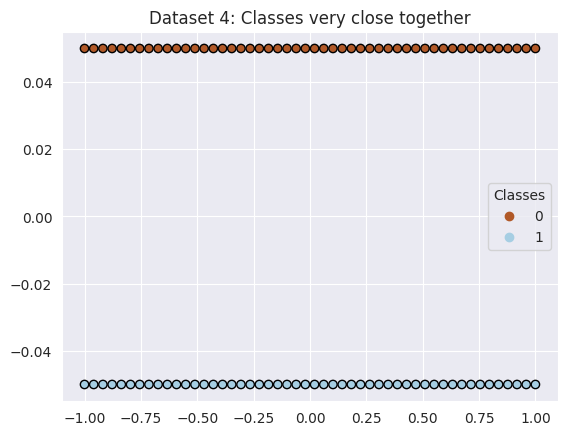

In [10]:
num = 50
X4 = np.concatenate([
    np.vstack([np.linspace(-1, 1, num), [0.05]*num]).T,
    np.vstack([np.linspace(-1, 1, num), [-0.05]*num]).T
], axis=0)

y4 = np.concatenate([[0] * num, [1] * num], axis=0)

# visualize the dataset
fig, ax = plt.subplots()
scatter4 = ax.scatter(X4[:,0], X4[:, 1], c = y4, cmap = 'Paired_r', edgecolors='k')
legend4 = ax.legend(*scatter4.legend_elements(), title="Classes")
plt.title('Dataset 4: Classes very close together')
plt.show()

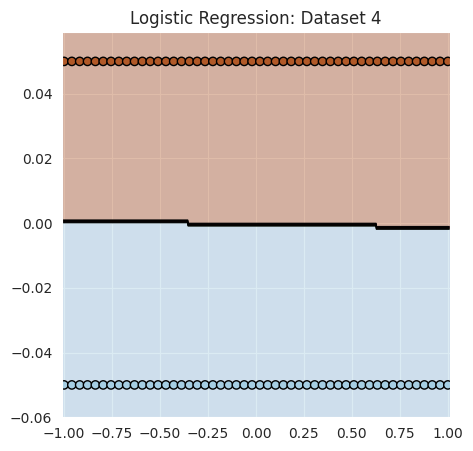

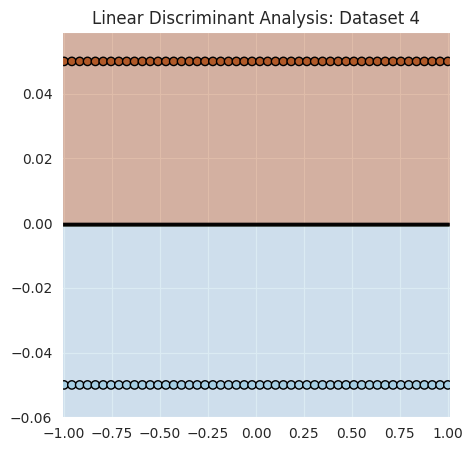

In [11]:
lr4 = LogisticRegression(penalty = None, solver = "lbfgs", multi_class = "multinomial", random_state = seed)
lda4 = LinearDiscriminantAnalysis()

lr4.fit(X4, y4)
lda4.fit(X4, y4)

plot_data(lr4, lda4, X4, y4, step = 0.001, title = 'Dataset 4')

### Dataset 5: 3D Data - Same Covariance

In this section, you may generate the dataset by running the cell below. Use the train and test datasets as split here. Fit both LR and LDA models on both datasets and print classification statistics on the **test set** using the ```sklearn.metrics.classification_report``` function.

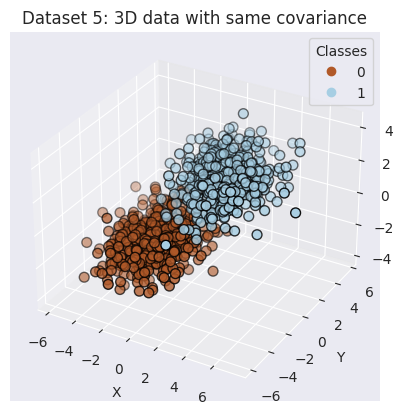

In [12]:
means5 = [[-1.5, -1.5, -1.5], [1.5, 1.5, 1.5]]
covs5 = [
    [[2, 0, 0], [0, 1.8660254, 0.5], [0, 0.5, 0.5]],
    [[2, 0, 0], [0, 1.8660254, 0.5], [0, 0.5, 0.5]]
]
num = 500  # datapoints per class

X5 = np.concatenate([
    np.random.multivariate_normal(means5[0], covs5[0], size=(num,)),
    np.random.multivariate_normal(means5[1], covs5[1], size=(num,))
], axis=0)
y5 = np.concatenate([[0] * num, [1] * num], axis=0)
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, y5, test_size = 0.2, 
                            random_state = seed, shuffle = True)

# visualizing the dataset
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
scatter5 = ax.scatter(X5[:, 0], X5[:, 1], X5[:, 2], s = 50, c = y5, cmap = 'Paired_r', edgecolor='k')
legend5 = ax.legend(*scatter5.legend_elements(), title="Classes")
plt.title('Dataset 5: 3D data with same covariance')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [13]:
### WRITE CODE HERE ###
# Fit both LR and LDA on the dataset 5
# report all classification metrics on the TEST SET

### Dataset 6: 3D Data - Different Covariance

In this section, you may generate the dataset by running the cell below. Use the train and test datasets as split here. Fit both LR and LDA models on both datasets and print classification statistics on the **test set** using the ```sklearn.metrics.classification_report``` function.

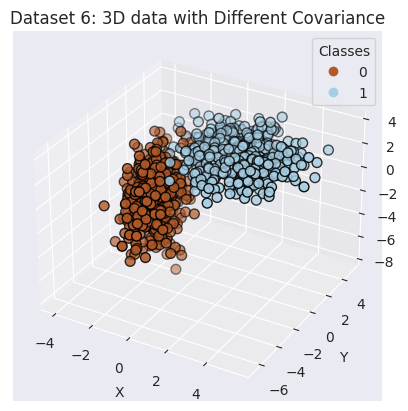

In [14]:
means6 = [[-1.5, -1.5, -1.5], [1.5, 1.5, 1.5]]
covs6 = [
    [[0.5, -0.5, 0], [-0.5, 2.5, 0], [0, 0, 3]],
    [[2, 0, 0], [0, 1.8660254, 0.5], [0, 0.5, 0.5]]
]
num = 500  # datapoints per class

X6 = np.concatenate([
    np.random.multivariate_normal(means6[0], covs6[0], size=(num,)),
    np.random.multivariate_normal(means6[1], covs6[1], size=(num,))
], axis=0)
y6 = np.concatenate([[0] * num, [1] * num], axis=0)
X6_train, X6_test, Y6_train, Y6_test = train_test_split(X6, y6, test_size = 0.2, 
                            random_state = seed, shuffle = True)

# visualizing the dataset
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
scatter6 = ax.scatter(X6[:, 0], X6[:, 1], X6[:, 2], s = 50, c = y6, cmap = 'Paired_r', edgecolor='k')
legend6 = ax.legend(*scatter5.legend_elements(), title="Classes")
plt.title('Dataset 6: 3D data with Different Covariance')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [15]:
### WRITE CODE HERE ###
# Fit both LR and LDA on the dataset 6
# report all classification metrics on the TEST SET